In [183]:
import json


SENSORES = ['DHT22', 'DHT11']
PIN_DATA_DHT11 = 17
# TODO Leer de disco o identificar configuración:
PIN_DATA_DHT22 = 22

pinout = dict(zip(SENSORES, [22, 17]))
pinout

{'DHT11': 17, 'DHT22': 22}

In [2]:
json.dumps(pinout)

'{"DHT11": 17, "DHT22": 22}'

In [184]:
import os
import pandas as pd
import glob


os.chdir('/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/')
glob.glob('*')

['CURRENT_MONTH',
 'D1_potencia_consumo_ldr_rm60.png',
 'D1_potencia_consumo_ldr_rs10s.pdf',
 'D1_potencia_consumo_ldr_rs1m.png',
 'D2_potencia_consumo_ldr_rm60.png',
 'D3_potencia_consumo_ldr.png',
 'data_2016_08.h5_bad',
 'data_juan_iborra_3d.h5',
 'data_juan_iborra_3d_bzip2.h5',
 'data_juan_iborra_3d_default.h5',
 'data_juan_iborra_3d_default_big.h5',
 'data_juan_iborra_3d_zlib.h5',
 'debug_rpitemps_.csv',
 'enerpi.log',
 'enerpi_2.log',
 'enerpi_data.h5',
 'enerpi_log_D3.log',
 'enerpi_other.log',
 'enerpi_potencia_consumo_ldr_20160802_2312_20160803_1925.png',
 'enerpi_potencia_consumo_ldr_20160803_2032_20160804_2359.pdf',
 'enerpi_potencia_consumo_ldr_20160804_2032_20160805_1323.png',
 'juan_iborra_1.h5',
 'juan_iborra_2.h5',
 'juan_iborra_3.h5',
 'log_debug.csv',
 'new.h5',
 'YEAR_2016']

In [7]:
pd.read_hdf('new.h5', 'rms', stop=1000)

HDF5ExtError: HDF5 error back trace

  File "H5Dio.c", line 173, in H5Dread
    can't read data
  File "H5Dio.c", line 551, in H5D__read
    can't read data
  File "H5Dchunk.c", line 1875, in H5D__chunk_read
    unable to read raw data chunk
  File "H5Dchunk.c", line 2905, in H5D__chunk_lock
    data pipeline read failed
  File "H5Z.c", line 1372, in H5Z_pipeline
    filter returned failure during read
  File "H5Zdeflate.c", line 125, in H5Z_filter_deflate
    inflate() failed

End of HDF5 error back trace

Problems reading records.

In [24]:
glob.glob('*/*.h5', recursive=True), glob.glob('*.h5', recursive=True)

(['CURRENT_MONTH/data_20160808_1.h5', 'CURRENT_MONTH/data_20160808_2.h5'],
 ['data_2016_08.h5',
  'enerpi_data.h5',
  'juan_iborra_1.h5',
  'juan_iborra_2.h5',
  'juan_iborra_3.h5',
  'new.h5'])

In [36]:
import re

YEAR_MASK = '{}_YEAR_{:%Y}'
RG_YEAR_MASK = re.compile('(?P<name>\.*)_YEAR_(?P<year>\d{4})')
MONTH_MASK = '{}_{:%Y_MONTH_%m}'
RG_MONTH_MASK = re.compile('(?P<name>\.*)_(?P<year>\d{4})_MONTH_(?P<month>\d{2})')
DAY_MASK = '{}_{:%Y_%m_DAY_%d}'
RG_DAY_MASK = re.compile('(?P<name>\.*)_(?P<year>\d{4})_(?P<month>\d{2})_DAY_(?P<day>\d{2})')

files = [f for f in glob.glob(os.path.join(os.getcwd(), '**'), recursive=True) if f.endswith('.h5')]

['/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/CURRENT_MONTH/data_20160808_1.h5',
 '/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/CURRENT_MONTH/data_20160808_2.h5',
 '/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/data_2016_08.h5',
 '/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/enerpi_data.h5',
 '/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/juan_iborra_1.h5',
 '/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/juan_iborra_2.h5',
 '/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/juan_iborra_3.h5',
 '/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/new.h5']

In [38]:
class HDFCatalog(object):

    def __init__(self, base_path=DATA_PATH, preffix='DATA'):
        self.base_path = os.path.abspath(base_path)
        self.name = preffix
        # self.intervalos = None
        self.min_ts = None
        self.tree = self._init_catalog_tree()

    def __repr__(self):
        print('HDFCatalog[{}->{}]'.format(self.name, self.base_path))

    def _get_paths_interval(self, ts_ini, ts_fin=None):
        # TODO glob del árbol desde DATA_PATH identificando archivos y tiempos.
        files = [f.replace(self.base_path, '') for f in glob.glob(os.path.join(self.base_path, '**'), recursive=True)
                 if f.endswith(STORE_EXT)]
        print(files)
        return files

    def _init_catalog_tree(self):
        # TODO glob del árbol desde DATA_PATH identificando archivos y tiempos.
        files = [f.replace(self.base_path, '') for f in glob.glob(os.path.join(self.base_path, '**'), recursive=True)
                 if f.endswith(STORE_EXT)]
        print(files)
        return files

    def distribute_data(self, data):
        # TODO separa en meses completos + días + resto. Crea directorios
        pass

    def info_catalog(self):
        # TODO Tabla de información del catálogo: ruta, archivo, n_rows, ts_ini, ts_fin, medidas de completitud
        pass

    def get(self):
        # TODO Load concat data de dt_ini, dt_fin. Con parser de textos? Devuelve data
        pass

    def append(self):
        # TODO Append new data
        pass

    def put(self):
        # TODO Put new data
        pass

    def map(self):
        # TODO aplicar función a datos por store?
        pass

    def archive(self):
        # TODO Compactado de datos MENSUAL / DIARIO / HORARIO?
        # De now a Today por horas
        # De Today a DAY_XX
        # De All DAY_XX a MONTH_XX
        pass

    def backup(self, path_backup, compact_data=None):
        # TODO backup a ruta alternativa, con compresión y opción de replicado de tree o compactado (x años, o total)
        pass

    def export(self, export_to='csv'):
        # TODO Exportación a CSV / append to mysql?
        pass



def _extract_info_store(file):
    with pd.HDFStore(os.path.join(base_path, file), 'r')

def _get_paths_interval(self, ts_ini, ts_fin=None):
    # TODO glob del árbol desde DATA_PATH identificando archivos y tiempos.
    files = [f.replace(self.base_path, '') for f in glob.glob(os.path.join(self.base_path, '**'), recursive=True)
             if f.endswith(STORE_EXT)]
    print(files)


    return files

    

['/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/data_2016_08.h5',
 '/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/enerpi_data.h5',
 '/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/juan_iborra_1.h5',
 '/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/juan_iborra_2.h5',
 '/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/juan_iborra_3.h5',
 '/Users/uge/Dropbox/PYTHON/PYPROJECTS/enerpi/enerpi/DATA/new.h5']

In [41]:
dfs = [pd.read_hdf(p, 'rms') for p in paths[1:]]
dfs[0].head()

,power,noise,ref,ldr
ts,,,,
2016-08-02 23:12:46.305646,592.416811,0.004734,84.0,0.186719
2016-08-02 23:12:47.316356,599.286578,0.004795,84.0,0.184285
2016-08-02 23:12:48.327245,601.662106,0.004747,84.0,0.183630
2016-08-02 23:12:49.337898,598.317571,0.004795,84.0,0.174957
2016-08-02 23:12:50.343299,595.473281,0.004817,82.0,0.168752


In [46]:
df_raw = pd.read_hdf(paths[0], 'raw')
print(df_raw.head())

df_raw.columns = dfs[0].columns
df_raw.index

                                   c1        c2     c3        c4
ts                                                              
2016-08-01 19:51:56.200602  42.551210  0.003470  120.0  0.844840
2016-08-01 19:51:57.209504  45.622881  0.003169  113.0  0.844919
2016-08-01 19:51:58.211276  46.696186  0.003200  113.0  0.845863
2016-08-01 19:51:59.219036  47.338830  0.003334  117.0  0.846282
2016-08-01 19:52:00.224722  47.181710  0.003260  121.0  0.845733


DatetimeIndex(['2016-08-01 19:51:56.200602', '2016-08-01 19:51:57.209504',
               '2016-08-01 19:51:58.211276', '2016-08-01 19:51:59.219036',
               '2016-08-01 19:52:00.224722', '2016-08-01 19:52:01.229116',
               '2016-08-01 19:52:02.235039', '2016-08-01 19:52:03.239766',
               '2016-08-01 19:52:04.245154', '2016-08-01 19:52:05.245117',
               ...
               '2016-08-02 20:06:51.132818', '2016-08-02 20:06:52.135769',
               '2016-08-02 20:06:53.137310', '2016-08-02 20:06:54.148574',
               '2016-08-02 20:06:55.160009', '2016-08-02 20:06:56.171088',
               '2016-08-02 20:06:57.179790', '2016-08-02 20:06:58.179914',
               '2016-08-02 20:06:59.180827', '2016-08-02 20:07:00.191887'],
              dtype='datetime64[ns]', name='ts', length=84510, freq=None)

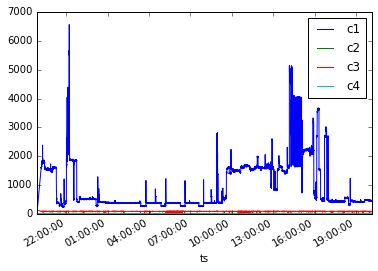

In [45]:
%matplotlib inline
df_raw.plot()

In [133]:
from prettyprinting import *

#from enerpi.database import append_delta_y_consumo
def _compress_data(data, verbose=False):
    if verbose:
        data.info()
    if not data.empty:
        data = data.copy().astype('float32')
        data['ref'] = data['ref'].astype('int16')
        data['ldr'] = (data['ldr'] * 1000).round(0).astype('int16')
        if verbose:
            data.info()
        return data
    return data


#df1, con1 = process_data(df_raw)
#con1
_compress_data(df_raw, verbose=True).head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84510 entries, 2016-08-01 19:51:56.200602 to 2016-08-02 20:07:00.191887
Data columns (total 4 columns):
power    84510 non-null float64
noise    84510 non-null float64
ref      84510 non-null int64
ldr      84510 non-null float64
dtypes: float64(3), int64(1)
memory usage: 3.2 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84510 entries, 2016-08-01 19:51:56.200602 to 2016-08-02 20:07:00.191887
Data columns (total 4 columns):
power    84510 non-null float32
noise    84510 non-null float32
ref      84510 non-null int16
ldr      84510 non-null int16
dtypes: float32(2), int16(2)
memory usage: 1.6 MB


,power,noise,ref,ldr
ts,,,,
2016-08-01 19:51:56.200602,42.551208,0.003470,120,845
2016-08-01 19:51:57.209504,45.622879,0.003169,113,845
2016-08-01 19:51:58.211276,46.696186,0.003200,113,846
2016-08-01 19:51:59.219036,47.338829,0.003334,117,846
2016-08-01 19:52:00.224722,47.181709,0.003260,121,846


In [130]:
#print_info(df1.dtypes)
#df1.info()
df_tot = pd.concat([df_raw] + dfs)
df_tot_c = _compress_data(df_tot, verbose=True)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301560 entries, 2016-08-01 19:51:56.200602 to 2016-08-05 13:23:11.682163
Data columns (total 4 columns):
power    301560 non-null float64
noise    301560 non-null float64
ref      301560 non-null float64
ldr      301560 non-null float64
dtypes: float64(4)
memory usage: 11.5 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301560 entries, 2016-08-01 19:51:56.200602 to 2016-08-05 13:23:11.682163
Data columns (total 4 columns):
power    301560 non-null float64
noise    301560 non-null float64
ref      301560 non-null float64
ldr      301560 non-null float64
dtypes: float64(4)
memory usage: 11.5 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301560 entries, 2016-08-01 19:51:56.200602 to 2016-08-05 13:23:11.682163
Data columns (total 4 columns):
power    301560 non-null float32
noise    301560 non-null float32
ref      301560 non-null int16
ldr      301560 non-null int16
dtypes: float32(2), int16(2)
memory usage: 5.8 MB


In [185]:
from enerpi.base import timeit

use_fletcher32 = True

@timeit('_save_hdf')
def _save_hdf(data, path, **kwargs):
    data.to_hdf(path, 'rms', **kwargs)
    print_cyan('STORE "{}"\t->\t{:.1f} KB'.format(path, os.path.getsize(path) / 1000))

_save_hdf(df_tot, 'data_juan_iborra_3d_default_big.h5')
_save_hdf(df_tot_c, 'data_juan_iborra_3d_default.h5')
_save_hdf(df_tot_c, 'data_juan_iborra_3d_zlib.h5', complevel=9, complib='zlib', fletcher32=use_fletcher32)
_save_hdf(df_tot_c, 'data_juan_iborra_3d_bzip2.h5', complevel=9, complib='bzip2', fletcher32=use_fletcher32)
_save_hdf(df_tot_c, 'data_juan_iborra_3d.h5', complevel=9, complib='blosc', fletcher32=use_fletcher32)

STORE "data_juan_iborra_3d_default_big.h5"	->	12069.6 KB
_save_hdf TOOK: 0.034 s
STORE "data_juan_iborra_3d_default.h5"	->	6040.6 KB
_save_hdf TOOK: 0.027 s
STORE "data_juan_iborra_3d_zlib.h5"	->	2844.0 KB
_save_hdf TOOK: 0.244 s
STORE "data_juan_iborra_3d_bzip2.h5"	->	2879.3 KB
_save_hdf TOOK: 1.046 s
STORE "data_juan_iborra_3d.h5"	->	3253.0 KB
_save_hdf TOOK: 0.067 s


In [186]:
@timeit('_load_hdf')
def _load_hdf(path, **kwargs):
    data = pd.read_hdf(path, 'rms', **kwargs)
    print_cyan('STORE "{}"\t->\t{:.1f} KB'.format(path, os.path.getsize(path) / 1000))
    return data

df = _load_hdf('data_juan_iborra_3d_default_big.h5')
df = _load_hdf('data_juan_iborra_3d_default.h5')
df = _load_hdf('data_juan_iborra_3d_zlib.h5')
df = _load_hdf('data_juan_iborra_3d_bzip2.h5')
df = _load_hdf('data_juan_iborra_3d.h5')

STORE "data_juan_iborra_3d_default_big.h5"	->	12069.6 KB
_load_hdf TOOK: 0.009 s
STORE "data_juan_iborra_3d_default.h5"	->	6040.6 KB
_load_hdf TOOK: 0.007 s
STORE "data_juan_iborra_3d_zlib.h5"	->	2844.0 KB
_load_hdf TOOK: 0.025 s
STORE "data_juan_iborra_3d_bzip2.h5"	->	2879.3 KB
_load_hdf TOOK: 0.214 s
STORE "data_juan_iborra_3d.h5"	->	3253.0 KB
_load_hdf TOOK: 0.014 s


In [231]:
@timeit('_process_data')
def _process_data(data, verbose=False):
    if not data.empty:
        if verbose:
            data.info()
        data = data.copy()
        deltas = pd.Series(data.index).diff().fillna(method='bfill')
        frac_hora = deltas / pd.Timedelta(hours=1)
        data['Wh'] = data.power * frac_hora.values
        data['delta'] = deltas.values
        data.loc[data['delta'] > '3s', 'high_delta'] = True
        data.loc[data['delta'] > '1min', 'execution'] = 1
        resampler = data[['power', 'Wh', 'delta', 'high_delta', 'execution']].resample('1h', label='left')
        consumo = (pd.DataFrame(resampler['Wh'].sum().rename('kWh')).fillna(0.) / 1000.).astype('float32')
        consumo['t_ref'] = (resampler['delta'].sum() / pd.Timedelta(hours=1)).astype('float32')
        consumo['n_jump'] = resampler['high_delta'].sum().fillna(0).astype('int16')
        consumo['n_exec'] = resampler['execution'].sum().fillna(0).astype('int32')
        consumo['p_max'] = resampler['power'].max().round(0).astype('float16')
        consumo['p_mean'] = resampler['power'].mean().round(0).astype('float16')
        consumo['p_min'] = resampler['power'].min().round(0).astype('float16')
        print_info(consumo.head())
        data['high_delta'] = data['high_delta'].astype(bool)
        data['execution'] = data['execution'].astype(bool)
        data.drop(['delta', 'Wh'], axis=1, inplace=True)
        if verbose:
            data.info()
            consumo.info()
        return data, consumo
    return data, None


df_p, consumo = _process_data(df, verbose=True)
consumo.to_hdf('data_juan_iborra_3d.h5', 'horas')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301560 entries, 2016-08-01 19:51:56.200602 to 2016-08-05 13:23:11.682163
Data columns (total 4 columns):
power    301560 non-null float32
noise    301560 non-null float32
ref      301560 non-null int16
ldr      301560 non-null int16
dtypes: float32(2), int16(2)
memory usage: 5.8 MB
                          kWh     t_ref  n_jump  n_exec   p_max  p_mean   p_min
ts                                                                             
2016-08-01 19:00:00  0.001968  0.033459       0       0    75.0    59.0    40.0
2016-08-01 20:00:00  1.769897  1.100953       1       1  2384.0  1605.0  1429.0
2016-08-01 21:00:00  0.715201  1.000046       0       0  1635.0   715.0   231.0
2016-08-01 22:00:00  1.716943  1.000071       0       0  6568.0  1717.0   401.0
2016-08-01 23:00:00  0.515473  1.000022       0       0   606.0   515.0   474.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301560 entries, 2016-08-01 19:51:56.200602 to 2016-

In [188]:
path_st = 'data_juan_iborra_3d.h5'
with pd.HDFStore(path_st, 'r') as st:
    print_info(st)
    data = st['rms']
    dh = st['horas']
    print_red('{:.1f} KB'.format(os.path.getsize(path_st) / 1000))

<class 'pandas.io.pytables.HDFStore'>
File path: data_juan_iborra_3d.h5
/horas            frame        (shape->[91,7])    
/rms              frame        (shape->[301560,4])
3255.1 KB


In [232]:
# Separa y clasifica:
ahora = pd.Timestamp.now()
current_year = ahora.year
current_month = ahora.month
current_day = ahora.day
ahora, current_year, current_month, current_day


'''
YEAR_MASK = 'YEAR_{:%Y}'
RG_YEAR_MASK = re.compile('(?P<name>\.*)_YEAR_(?P<year>\d{4})')
MONTH_MASK = '{}_{:%Y_MONTH_%m}'
RG_MONTH_MASK = re.compile('(?P<name>\.*)_(?P<year>\d{4})_MONTH_(?P<month>\d{2})')
DAY_MASK = '{}_{:%Y_%m_DAY_%d}'
RG_DAY_MASK = re.compile('(?P<name>\.*)_(?P<year>\d{4})_(?P<month>\d{2})_DAY_(?P<day>\d{2})')
'''
DIR_CURRENT_MONTH = 'CURRENT_MONTH'
preffix = 'ENERPI_DATA'
DAY_MASK = '{}_{:%Y_%m_DAY_%d}'

def _make_index_path(ts, w_day=False):
    if w_day:
        p = os.path.join(DIR_CURRENT_MONTH, DAY_MASK.format(preffix, ts))
    else:
        p = os.path.join(YEAR_MASK.format(ts), MONTH_MASK.format(preffix, ts))
    return p


def _clasifica_data(df):
    ahora = pd.Timestamp.now()
    ts_ini, ts_fin = df.index[0], df.index[-1]
    gb_años = data.groupby(pd.TimeGrouper(freq='A'))
    for ts_year, d_year in gb_años:
        gb_meses = d_year.groupby(pd.TimeGrouper(freq='M'))
        for ts_month, d_month in gb_meses:
            if (ts_year.year == ahora.year) and (ts_month.month == ahora.month):
                # CURRENT MONTH
                print_red('# CURRENT MONTH')
                gb_dias = d_month.groupby(pd.TimeGrouper(freq='D', closed='left', label='left'))
                for ts_day, d_day in gb_dias:
                    if ts_day.day == ahora.day:
                        # TODAY
                        print_magenta('# TODAY')
                    else:
                        # ARCHIVE DAY
                        print_red('# ARCHIVE DAY {:%Y-%m-%d}'.format(ts_day))
                        p = _make_index_path(ts_day, w_day=True)
                        d_day_p, c_day = _process_data(d_day)
                        print_info(p)
                        print_cyan(d_day.head(2))
                        print_cyan(d_day_p.tail(2))
                        print_red(c_day.head(2))
            else:
                # ARCHIVE MONTH
                print_red('# ARCHIVE MONTH')
                p = _make_index_path(ts_month, w_day=False)
                d_month_p, c_month = _process_data(d_month)
        print('DONE!')


_clasifica_data(data)

# CURRENT MONTH
# ARCHIVE DAY 2016-08-01
CURRENT_MONTH/ENERPI_DATA_2016_08_DAY_01
                          kWh     t_ref  n_jump  n_exec   p_max  p_mean   p_min
ts                                                                             
2016-08-01 19:00:00  0.001968  0.033459       0       0    75.0    59.0    40.0
2016-08-01 20:00:00  1.769897  1.100953       1       1  2384.0  1605.0  1429.0
2016-08-01 21:00:00  0.715201  1.000046       0       0  1635.0   715.0   231.0
2016-08-01 22:00:00  1.716943  1.000071       0       0  6568.0  1717.0   401.0
2016-08-01 23:00:00  0.515473  1.000022       0       0   606.0   515.0   474.0
_process_data TOOK: 0.027 s
                                power     noise  ref  ldr
ts                                                       
2016-08-01 19:51:56.200602  42.551208  0.003470  120  845
2016-08-01 19:51:57.209504  45.622879  0.003169  113  845
                                 power     noise  ref  ldr high_delta execution
ts                

In [254]:
pd.Timestamp.fromtimestamp(os.path.getmtime(path_st))

Timestamp('2016-08-11 15:03:36')

In [250]:
def _get_paths_interval(ts_ini, ts_fin=None):
    ts_ini = pd.Timestamp(ts_ini)
    ts_fin = pd.Timestamp(ts_fin) if ts_fin else pd.Timestamp.now()
    periods = (ts_fin.year * 12 + ts_fin.month) - (ts_ini.year * 12 + ts_ini.month)
    index = pd.DatetimeIndex(freq='M', start=ts_ini.date(), periods=periods + 1)
    paths = [for i in index]
    
    return pd.DatetimeIndex(freq='M', start=ts_ini.date(), periods=periods + 1)
        
    
_get_paths_interval('2016-02-03', ts_fin=None)
_get_paths_interval('2016-02-01', ts_fin=None)
_get_paths_interval('2016-01-31', ts_fin=None)
_get_paths_interval('2016-01-31', ts_fin='2016-02-01')
_get_paths_interval('2016-08-01', ts_fin='2016-08-11')

6 2016-02-03 2016-08-11
DatetimeIndex(['2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31'], dtype='datetime64[ns]', freq='M')
6 2016-02-01 2016-08-11
DatetimeIndex(['2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31'], dtype='datetime64[ns]', freq='M')
7 2016-01-31 2016-08-11
DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31'], dtype='datetime64[ns]', freq='M')
1 2016-01-31 2016-02-01
DatetimeIndex(['2016-01-31', '2016-02-29'], dtype='datetime64[ns]', freq='M')
0 2016-08-01 2016-08-11
DatetimeIndex(['2016-08-31'], dtype='datetime64[ns]', freq='M')


DatetimeIndex(['2016-08-31'], dtype='datetime64[ns]', freq='M')

In [279]:
#last = pd.read_hdf('2016_08_10.h5', 'rms')
p1 = last.copy()
p1.index = p1.index - pd.Timedelta('60D')
p2 = last.copy()
p2.index = p2.index - pd.Timedelta('180D')
p3 = last.copy()
p3.index = p2.index - pd.Timedelta('360D')

p1.to_hdf('pru1_jun.h5', 'rms')
p2.to_hdf('pru2.h5', 'rms')
p3.to_hdf('pru3_15.h5', 'rms')
p3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7500 entries, 2015-02-17 21:26:49.378310 to 2015-02-18 11:27:40.109109
Data columns (total 4 columns):
power    7500 non-null float64
noise    7500 non-null float64
ref      7500 non-null float64
ldr      7500 non-null float64
dtypes: float64(4)
memory usage: 293.0 KB


In [270]:
pd.read_hdf('DATA_YEAR_2015/DATA_2015_MONTH_02.h5', 'rms').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7500 entries, 2015-02-17 21:26:49.378310 to 2015-02-18 11:27:40.109109
Data columns (total 4 columns):
power    7500 non-null float64
noise    7500 non-null float64
ref      7500 non-null float64
ldr      7500 non-null float64
dtypes: float64(4)
memory usage: 293.0 KB


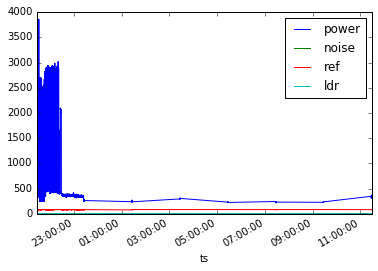

In [274]:
last.plot()


In [277]:
last.loc['2016-08-11 00:00':'2016-08-11 11:00']

,power,noise,ref,ldr
ts,,,,
2016-08-11 01:26:02.433825,238.806735,0.005109,77.0,0.030926
2016-08-11 01:26:03.444509,239.324132,0.005226,84.0,0.030401
2016-08-11 01:26:04.455247,242.482888,0.005160,84.0,0.028026
2016-08-11 01:26:05.456690,248.397511,0.005048,74.0,0.017416
2016-08-11 01:26:06.462287,262.170834,0.005323,80.0,0.023375
2016-08-11 01:26:07.468395,273.267472,0.005509,76.0,0.029831
2016-08-11 01:26:08.478759,257.037725,0.005502,84.0,0.034076
2016-08-11 01:26:09.489191,234.616330,0.005362,84.0,0.034304
2016-08-11 01:26:10.499698,237.029302,0.005269,84.0,0.034230


In [221]:
for day, g in gb_años:
    print_red(day.year)
    print_info(g.head())
    
for day, g in gb_meses:
    print_red(day)
    print_red(day.month)
    print_info(g.head())
    print_cyan(g.tail())

2016
                                power     noise  ref  ldr
ts                                                       
2016-08-01 19:51:56.200602  42.551208  0.003470  120  845
2016-08-01 19:51:57.209504  45.622879  0.003169  113  845
2016-08-01 19:51:58.211276  46.696186  0.003200  113  846
2016-08-01 19:51:59.219036  47.338829  0.003334  117  846
2016-08-01 19:52:00.224722  47.181709  0.003260  121  846
2016-08-31 00:00:00
8
                                power     noise  ref  ldr
ts                                                       
2016-08-01 19:51:56.200602  42.551208  0.003470  120  845
2016-08-01 19:51:57.209504  45.622879  0.003169  113  845
2016-08-01 19:51:58.211276  46.696186  0.003200  113  846
2016-08-01 19:51:59.219036  47.338829  0.003334  117  846
2016-08-01 19:52:00.224722  47.181709  0.003260  121  846
                                  power     noise  ref  ldr
ts                                                         
2016-08-05 13:23:07.643264  1787.606689  

In [294]:
horas = pd.read_hdf('CURRENT_MONTH/DATA_2016_08_DAY_11.h5', 'hours')
rms = pd.read_hdf('CURRENT_MONTH/DATA_2016_08_DAY_11.h5', 'rms')
rms.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 2016-08-11 01:26:02.433825 to 2016-08-11 11:27:40.109109
Data columns (total 6 columns):
power         360 non-null float32
noise         360 non-null float32
ref           360 non-null int16
ldr           360 non-null int16
high_delta    360 non-null bool
execution     360 non-null bool
dtypes: bool(2), float32(2), int16(2)
memory usage: 7.7 KB


In [326]:
l = list(filter(lambda x: x[0] is not None, zip([data, None, None], 
                                       ['key_raw', 'key_summary', 'key_summary_extra'])))
list(zip(*l))[1], list(zip(*l))[1]

(('key_raw',), ('key_raw',))

In [300]:

deltas = pd.Series(data.index).diff().fillna(method='bfill')
frac_hora = deltas / pd.Timedelta(hours=1)
data['Wh'] = data.power * frac_hora.values
data['delta'] = deltas.values
data.loc[data['delta'] > '3s', 'high_delta'] = True
data.dtypes

power                 float32
noise                 float32
ref                     int16
ldr                     int16
Wh                    float64
delta         timedelta64[ns]
high_delta             object
dtype: object

In [306]:
data['delta'] = pd.Series(data.index).diff().fillna(method='bfill').dt.total_seconds().values
data['Wh'] = data.power * data.delta / 3600
data.loc[data['delta'] > 3, 'high_delta2'] = True
data.loc[data['delta'] > 60, 'execution'] = 1
print_cyan(data.head())
data[data['delta'] > 3]

                                power     noise  ref  ldr        Wh     delta high_delta  execution high_delta2
ts                                                                                                             
2016-08-01 19:51:56.200602  42.551208  0.003470  120  845  0.011925  1.008902       True        NaN         NaN
2016-08-01 19:51:57.209504  45.622879  0.003169  113  845  0.012786  1.008902       True        NaN         NaN
2016-08-01 19:51:58.211276  46.696186  0.003200  113  846  0.012994  1.001772       True        NaN         NaN
2016-08-01 19:51:59.219036  47.338829  0.003334  117  846  0.013252  1.007760       True        NaN         NaN
2016-08-01 19:52:00.224722  47.181709  0.003260  121  846  0.013181  1.005686       True        NaN         NaN


,power,noise,ref,ldr,Wh,delta,high_delta,execution,high_delta2
ts,,,,,,,,,
2016-08-01 20:11:30.908344,1613.394287,0.005505,84,586,472.932092,1055.263146,True,1.0,True
2016-08-02 05:14:44.966842,380.206360,0.004163,1,32,0.731895,6.929980,True,NaN,True
2016-08-02 05:15:35.748159,389.775543,0.004163,1,28,1.030848,9.520998,True,NaN,True
2016-08-02 05:16:03.063972,386.484192,0.003931,1,31,0.990961,9.230541,True,NaN,True
2016-08-02 05:16:23.650407,383.864990,0.004151,1,29,0.475307,4.457568,True,NaN,True
2016-08-02 05:17:42.897016,385.994965,0.004288,1,32,1.107244,10.326766,True,NaN,True
2016-08-02 05:18:40.977913,383.189026,0.004139,1,40,1.097856,10.314178,True,NaN,True
2016-08-02 05:19:51.548235,386.791168,0.004283,1,30,0.772349,7.188525,True,NaN,True
2016-08-02 05:20:56.579287,378.563934,0.004120,1,29,0.705038,6.704641,True,NaN,True


In [117]:
df_s = df1.copy()
df_s.noise = df_s.noise.round(5).astype('float32')
df_s.power = df_s.power.round(2).astype('float32')
df_s.Wh = df_s.Wh.astype('float32')
df_s.ref = df_s.ref.astype('int16')
df_s.ldr = (df_s.ldr * 1000).astype('int16')
df_s.delta = df_s.delta.dt.total_seconds().round(3).astype('float16')
df_s.high_delta = df_s.high_delta.astype(bool)
df_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84510 entries, 2016-08-01 19:51:56.200602 to 2016-08-02 20:07:00.191887
Data columns (total 8 columns):
power         84510 non-null float32
noise         84510 non-null float32
ref           84510 non-null int16
ldr           84510 non-null int16
Wh            84510 non-null float32
delta         84510 non-null float16
high_delta    84510 non-null bool
execution     1 non-null float64
dtypes: bool(1), float16(1), float32(3), float64(1), int16(2)
memory usage: 2.8 MB


In [122]:
#ts = df1[df1.delta > '1min'].index.values[0]
#df1.loc[ts  - pd.Timedelta('18min'):ts + pd.Timedelta('1min')]
#df_s.high_delta.describe()
df1.T.drop(['Wh', 'delta', 'high_delta', 'execution']).T.astype('float32').info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84510 entries, 2016-08-01 19:51:56.200602 to 2016-08-02 20:07:00.191887
Data columns (total 4 columns):
power    84510 non-null float32
noise    84510 non-null float32
ref      84510 non-null float32
ldr      84510 non-null float32
dtypes: float32(4)
memory usage: 1.9 MB


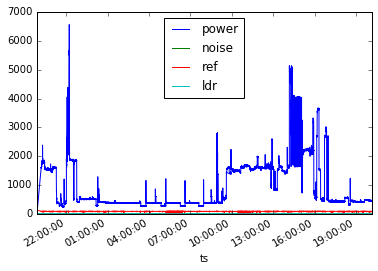

In [123]:
df1.T.drop(['Wh', 'delta', 'high_delta', 'execution']).T.astype('float32').plot()